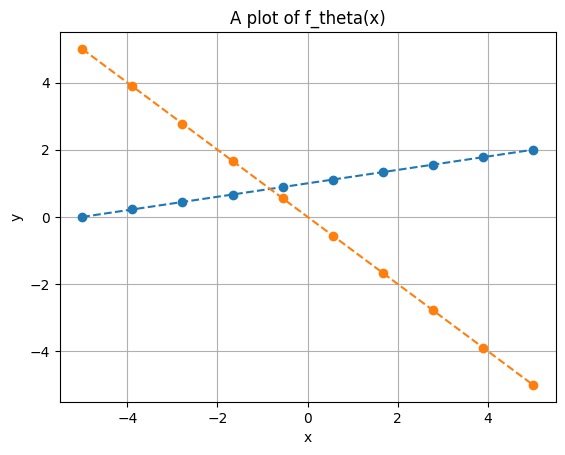

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

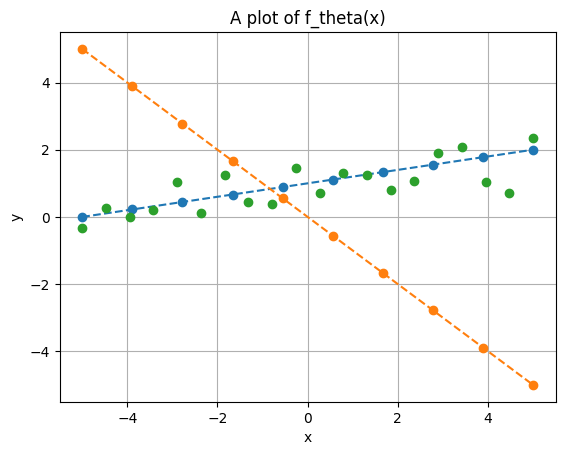

In [9]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

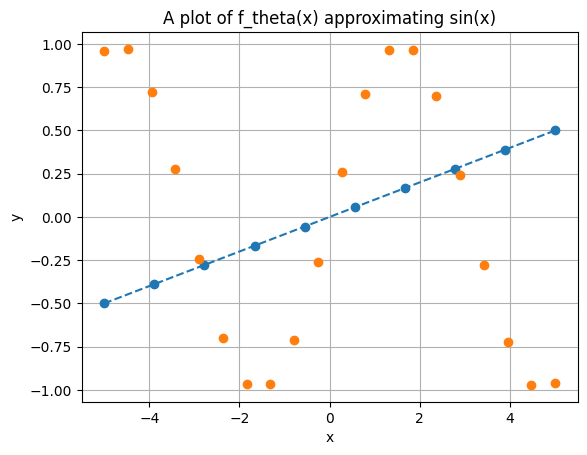

In [10]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = np.sin(x_data)

# Create a linear model approximation
xx = np.linspace(-5, 5, 10)
theta = (0, 0.1)
yy = f(theta, xx)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x) approximating sin(x)")
plt.show()

In [ ]:
import numpy as np

def l(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0]-1)**2 + (theta[1]-2)**2

def grad_l(theta):
    """
    NOTE: 
    """
    return np.array([2*(theta[0] - 1), 2*(theta[1] -2)])

def GD(l, grad_l, theta_0, eta, maxit):

    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta
    return theta

theta_0 = np.array([0, 0])
eta = 0.1
maxit = 100

theta_opt = GD(l, grad_l, theta_0, eta, maxit)
print("Optimal theta:", theta_opt)

Optimal theta: [1. 2.]


In [22]:
import numpy as np

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta:  current point (np.ndarray)
      - eta0:   initial step size
      - beta:   shrinking factor in (0,1)
      - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

def GD_backtracking(L, grad_L, theta_0, maxit):
    for k in range(maxit):
        eta = backtracking(L, grad_L, theta_0)
        theta_final = theta_0 - eta * grad_L(theta_0)
        #check stopping criteria
        if np.linalg.norm(theta_final - theta_0) < 1e-6:
            break
        theta_0 = theta_final
    return theta_final,k

theta_0 = np.array([0, 0])
eta = 0.1
maxit = 100
theta_opt, iters = GD_backtracking(l, grad_l, theta_0, maxit)
print("Optimal theta:", theta_opt, "found in", iters, "iterations")



Optimal theta: [1. 2.] found in 1 iterations
